In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Gerando dados
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
X

array([[ 9.24864618e-01, -2.37611343e-01],
       [ 2.58787486e+00, -1.12861588e-01],
       [-4.21032598e-01,  4.47484571e-01],
       [ 6.93144726e-01,  4.81777828e-01],
       [ 1.19085454e+00, -5.25164872e-01],
       [ 9.94381783e-01, -2.77397670e-01],
       [ 2.98869139e-01, -9.17072667e-02],
       [-3.51270342e-01,  6.44252757e-01],
       [ 7.16634200e-01, -4.86621909e-02],
       [ 3.48769755e-01,  2.47034674e-02],
       [ 1.44953830e+00,  6.34116623e-02],
       [ 4.29949457e-01,  6.90015000e-01],
       [ 1.18060633e+00, -4.75215171e-01],
       [ 8.44390356e-01,  1.13257830e+00],
       [-6.85940265e-02,  2.89934820e-01],
       [ 1.19780775e+00, -6.78449637e-01],
       [ 2.06918912e+00,  3.67875845e-01],
       [ 7.26366682e-01, -1.98188345e-01],
       [-5.68570831e-01,  2.32748641e-02],
       [ 4.48861543e-01,  4.85439221e-01],
       [-4.03999159e-03,  1.05013260e+00],
       [-1.07126492e+00,  2.37996596e-01],
       [ 1.54340797e+00, -6.26296747e-01],
       [ 1.

In [7]:
# Árvore de decisão sem restrições (overfitting)
overfit_model = DecisionTreeClassifier(max_depth=3, random_state=42)
overfit_model.fit(X_train, y_train)

# Avaliação no conjunto de treino e teste
train_pred = overfit_model.predict(X_train)
test_pred = overfit_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Acurácia no treino: {train_accuracy:.2f}")  # Geralmente alta
print(f"Acurácia no teste: {test_accuracy:.2f}")   # Geralmente baixa


Acurácia no treino: 0.90
Acurácia no teste: 0.90


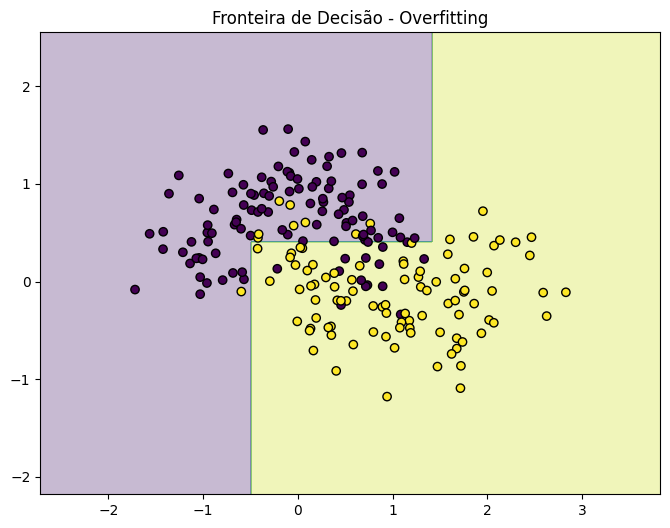

In [8]:
# Função para plotar a fronteira de decisão
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')

# Visualizar o overfitting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_boundary(overfit_model, X_train, y_train, ax)
ax.set_title("Fronteira de Decisão - Overfitting")
plt.show()
